In [2]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [3]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [4]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Loading the data from Antoine

In [5]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [6]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just SHH group

In [30]:
shh_list = set()

for column in data.columns:
    if "SHH" in column: 
        shh_list = shh_list.union(set(data[column].replace({"":None}).dropna()))   

print(shh_list)

{'INSM1', 'TCF12', 'PTCH1', 'YAP1', 'SOX13', 'SOX2', 'ZIC1', 'NFATC1', 'ZIC4', 'ATOH1', 'TGFBR1', 'PCNT', 'SUFU', 'BCOR', 'NCOR2', 'GLI2', 'SMO', 'RARB', 'BBX', 'PBX1', 'NHLH1', 'DMRTA1', 'CEBPA', 'PDLI3', 'POU3F3', 'LDB1'}


# Creating a Network starting from All Omnipath interactions

In [63]:
shh_net = Network(shh_list, resources = omnipath)

Error: node SOX13 is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node NHLH1 is not present in the resources database
Error: node DMRTA1 is not present in the resources database
Error: node PDLI3 is not present in the resources database


Adding the node that were not found manually: PDLI3 --> PDLIM3, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [64]:
shh_net.add_node("PDLIM3")

Error: node PDLIM3 is not present in the resources database


In [65]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,INSM1,Q01101,NaN
1,TCF12,Q99081,NaN
2,PTCH1,Q13635,NaN
3,YAP1,P46937,NaN
4,SOX2,P48431,NaN
5,ZIC1,Q15915,NaN
6,NFATC1,O95644,NaN
7,ATOH1,Q92858,NaN
8,TGFBR1,P36897,NaN
9,PCNT,O95613,NaN


In [61]:
%%time
shh_net.complete_connection(maxlen=4, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=True)

KeyboardInterrupt: 

In [58]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,INSM1,Q01101,NaN
1,TCF12,Q99081,NaN
2,PTCH1,Q13635,NaN
3,YAP1,P46937,NaN
4,SOX2,P48431,NaN
5,ZIC1,Q15915,NaN
6,NFATC1,O95644,NaN
7,ATOH1,Q92858,NaN
8,TGFBR1,P36897,NaN
9,PCNT,O95613,NaN


In [59]:
shh_net.edges

,source,target,Type,Effect,References
0,Q15915,P08151,None,stimulation,HPRD:11238441;SIGNOR:11238441;SPIKE:11238441;S...
1,P08151,Q13635,None,stimulation,ACSN:11001584;ACSN:11960000;ACSN:12138125;ACSN...
2,Q13635,Q99835,None,bimodal,BioGRID:9811851;CancerCellMap:9811851;HPMR:168...
3,Q99835,P17612,None,bimodal,ACSN:17641202;ACSN:17688959;ACSN:18820483;ACSN...
4,P17612,O95644,None,inhibition,ACSN:10611249;CA1:10611249;ProtMapper:12351631...
...,...,...,...,...,...
150,P24468,P19793,None,stimulation,SIGNOR:10900149;SPIKE_LC:7479078;SignaLink3:10...
151,Q16539,Q04206,None,stimulation,KEA:10521409;KEA:12767944;KEA:12842894;KEA:151...
152,O15111,Q04206,None,stimulation,CancerCellMap:12842894;HPRD-phos:12842894;HPRD...
153,P24468,P10827,None,stimulation,SPIKE_LC:7479078;SignaLink3:23331499;SignaLink...


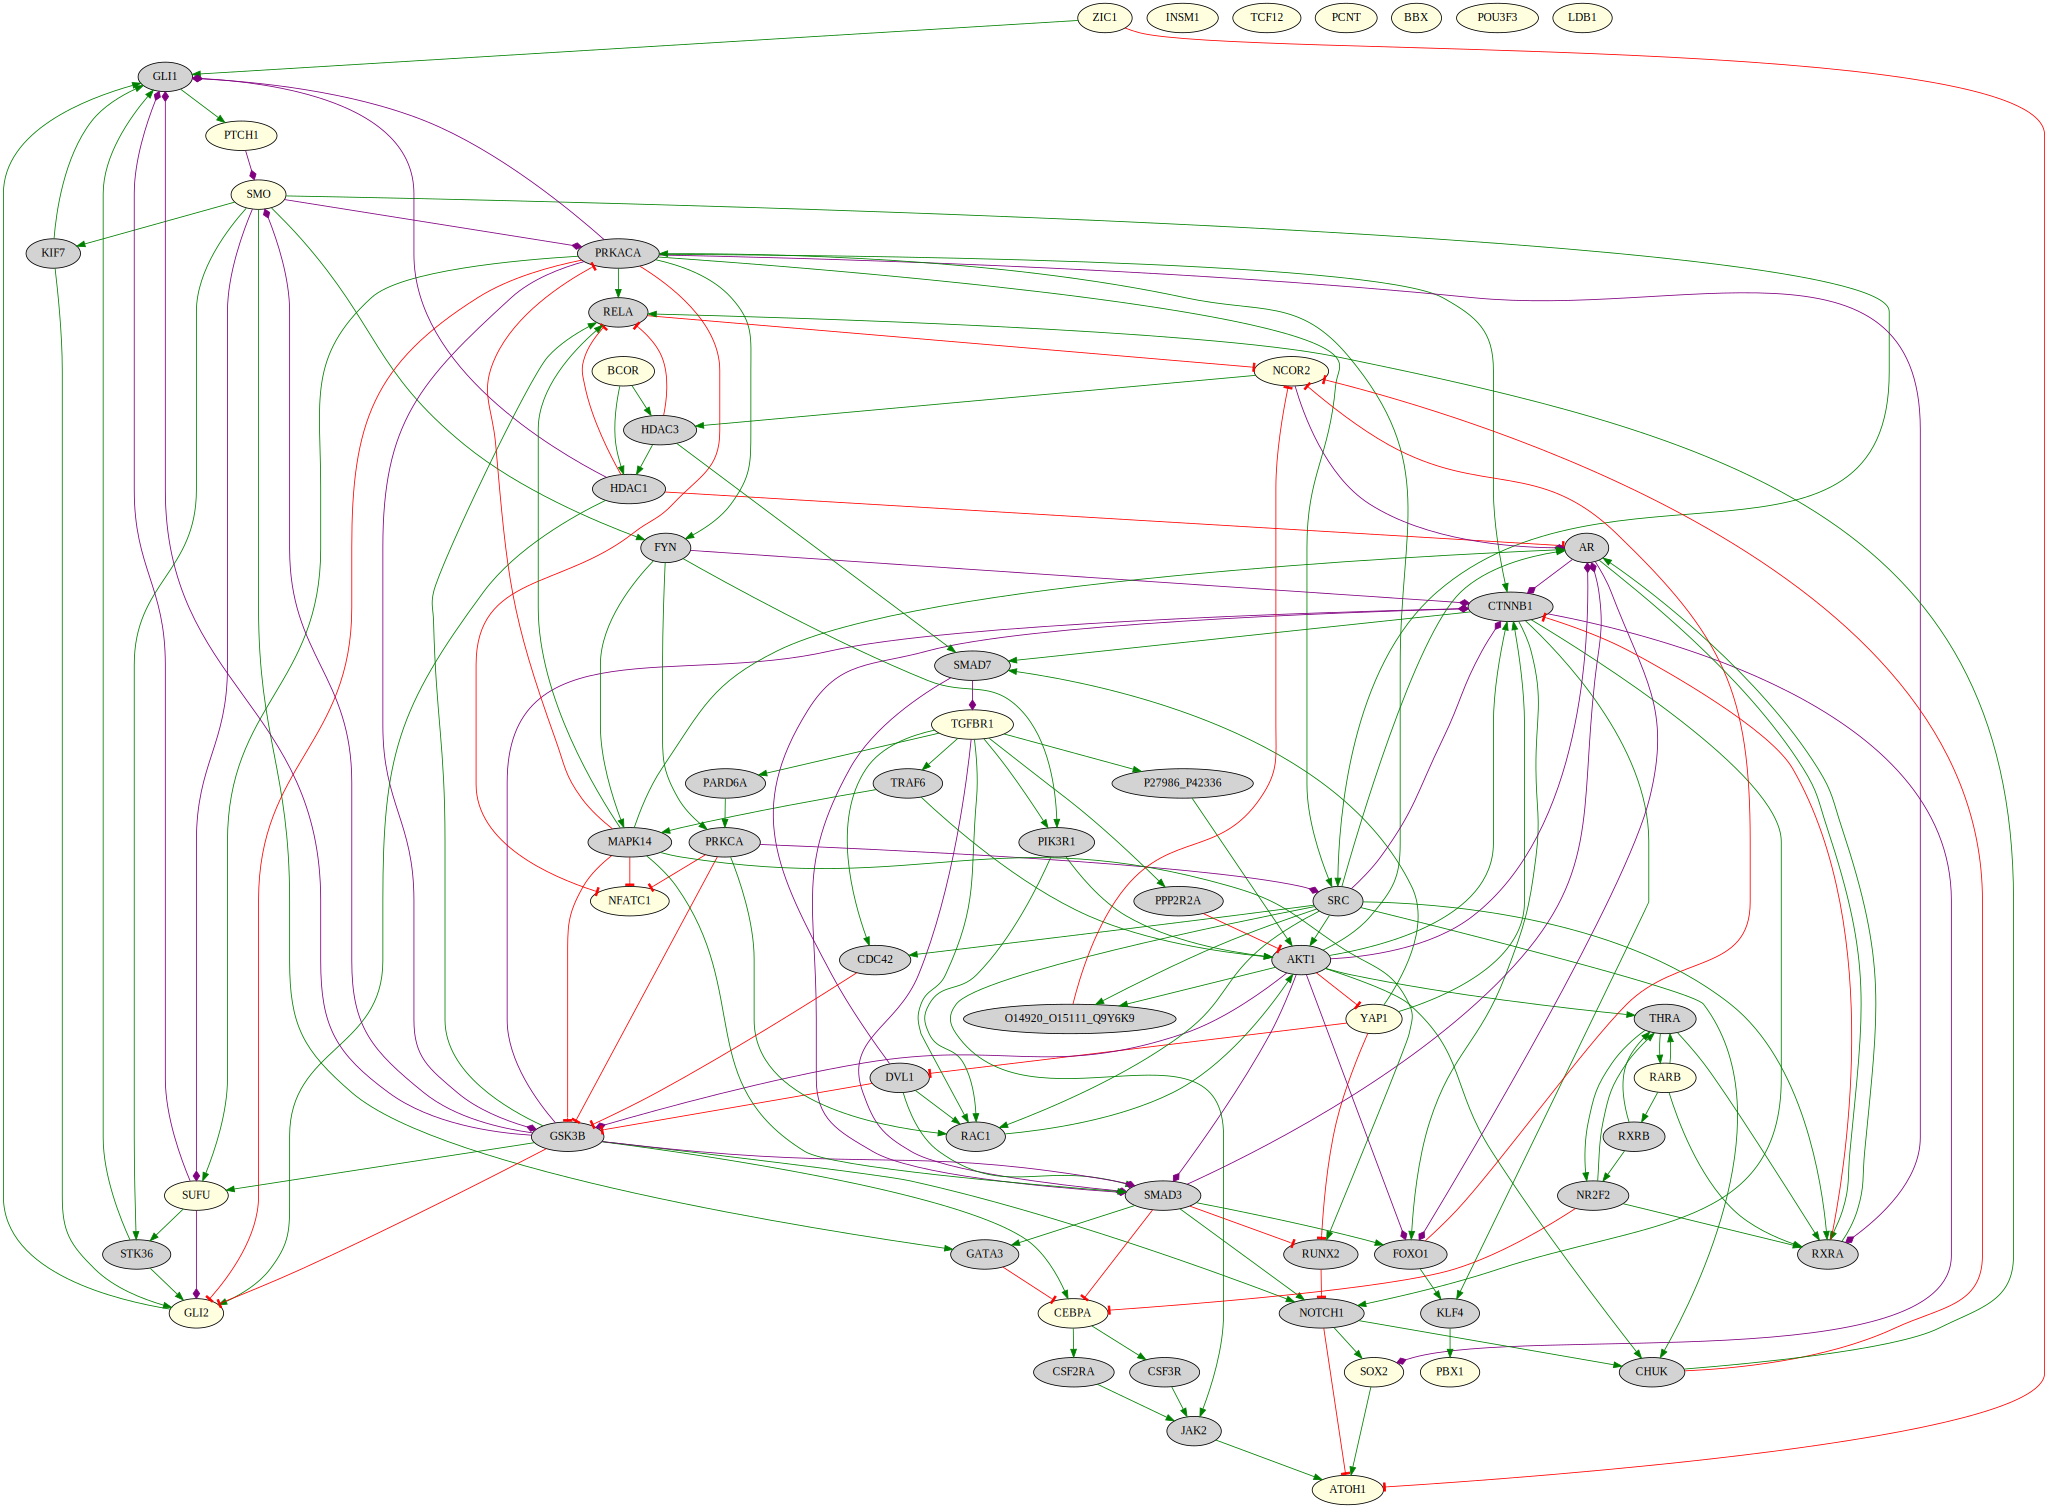

In [60]:
shh_visualizer = NetworkVisualizer(shh_net,color_by='effect', noi=True)
output = figures_folder + "SHH/SHH_all_omnipath"
shh_visualizer.render(output_file=output)

# Exporting Network in sif file

In [39]:
from neko._outputs.exports import Exports

In [40]:
shh_net.remove_node("PCNT")

In [41]:
shh_net.remove_node("INSM1")

In [42]:
shh_net.remove_node("BBX")

In [43]:
shh_net.remove_node("POU3F3")

In [44]:
shh_net.remove_node("LDB1")

In [45]:
export = Exports(shh_net)

In [46]:
export.export_sif(sif_output + "SHH_all_omnipath.sif")